# Kraskov-Stogbauer-Grassberger MI estimator + images

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
# Use Kraskov-Stogbauer-Grassberger MI estimator to run example tests.
from mutinfo.estimators.knn import KSG

estimator = KSG()

In [4]:
from utils.plots import *
from utils.tests import *

In [5]:
font = {'size' : 16}
matplotlib.rc('font', **font)

In [6]:
from mutinfo.distributions.base import CorrelatedNormal, CorrelatedStudent, CorrelatedUniform, GammaExponential, SmoothedUniform, UniformlyQuantized
from mutinfo.distributions.tools import mapped_multi_rv_frozen
from mutinfo.distributions.images.geometric import uniform_to_rectangle, draw_rectangle
from mutinfo.distributions.images.field import draw_field, symmetric_gaussian_field

In [7]:
MI_grid = np.linspace(0.0, 10.0, 11)
n_samples = 1000
n_runs = 10

image_shape = (16, 16)

In [8]:
import matplotlib.pyplot as plt

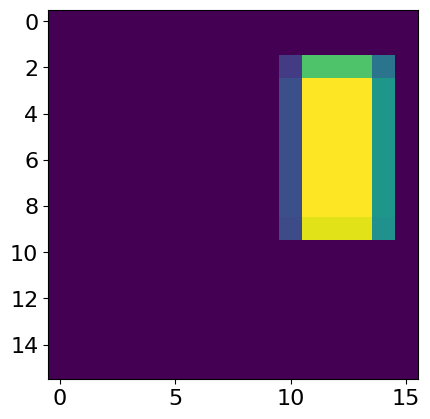

In [9]:
random_variable = mapped_multi_rv_frozen(
    CorrelatedUniform(5.0, 4, 4),
    lambda x, y: (
        draw_rectangle(uniform_to_rectangle(x, min_size=(0.2, 0.2)), image_shape),
        draw_rectangle(uniform_to_rectangle(y, min_size=(0.2, 0.2)), image_shape)
    )
)
x, y = random_variable.rvs(1)

plt.imshow(x[0])

In [10]:
estimated_MI = run_tests(
    lambda mutual_information : mapped_multi_rv_frozen(
        CorrelatedUniform(mutual_information, 4, 4),
        lambda x, y: (
            draw_rectangle(uniform_to_rectangle(x, min_size=(0.2, 0.2)), image_shape),
            draw_rectangle(uniform_to_rectangle(y, min_size=(0.2, 0.2)), image_shape)
        )
    ),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [03:44<00:00, 20.37s/it]


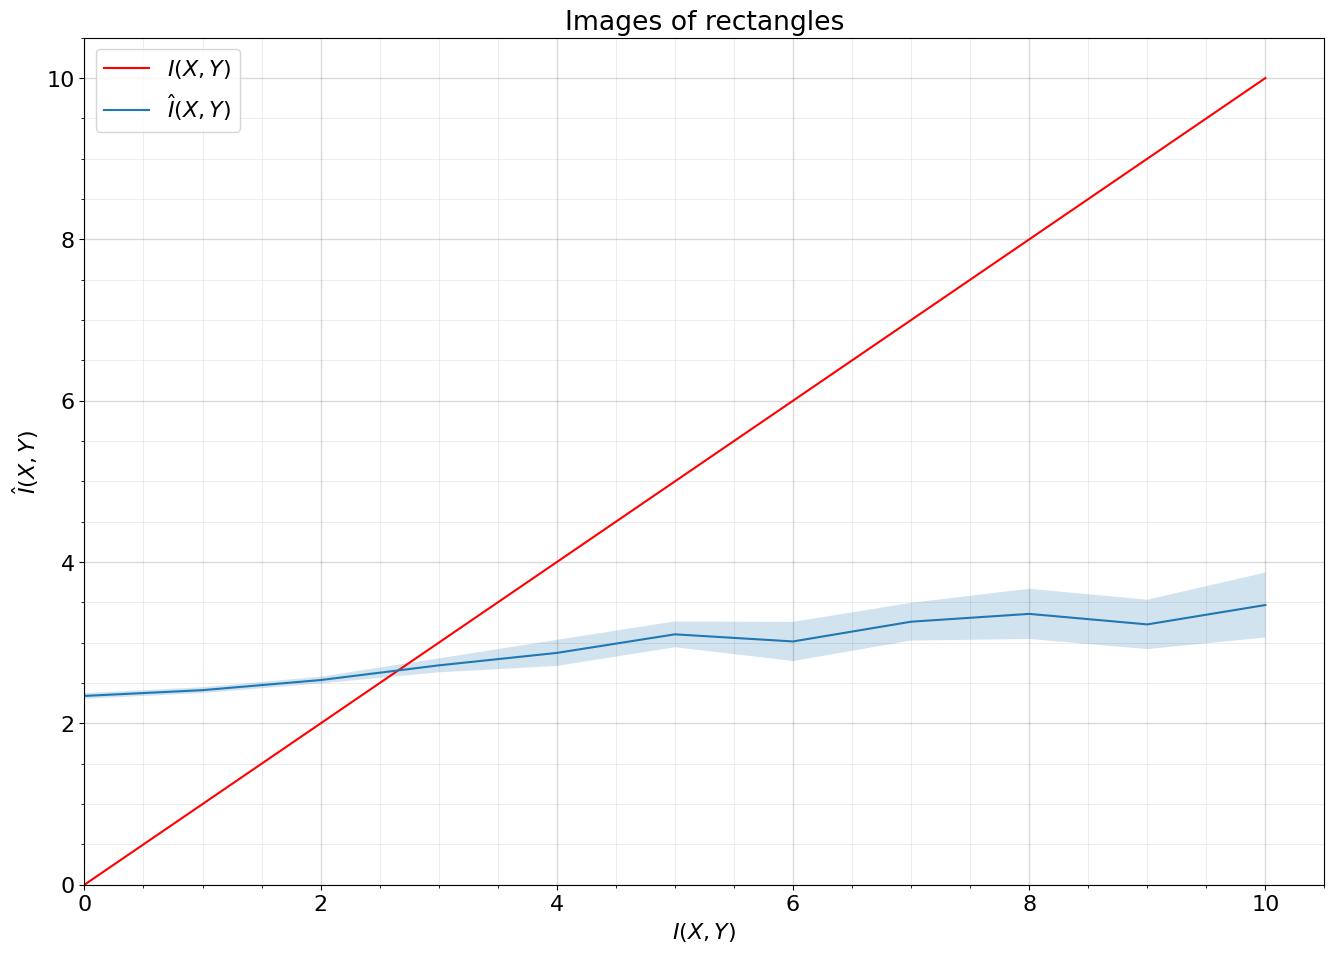

In [11]:
plot_estimated_MI(MI_grid, estimated_MI, "Images of rectangles")

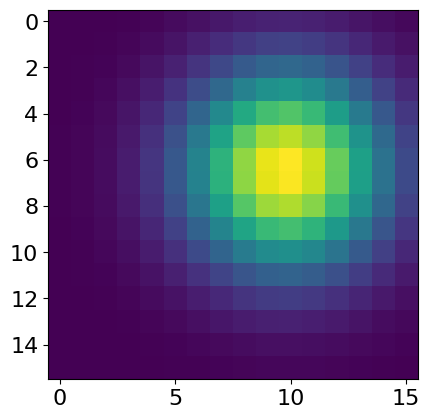

In [12]:
rv = mapped_multi_rv_frozen(
    CorrelatedUniform(5.0, 2, 2),
    lambda x, y: (
        draw_field(x, symmetric_gaussian_field, image_shape),
        draw_field(y, symmetric_gaussian_field, image_shape)
    )
)
x, y = rv.rvs(1)

plt.imshow(x[0])

In [13]:
estimated_MI = run_tests(
    lambda mutual_information : mapped_multi_rv_frozen(
        CorrelatedUniform(mutual_information, 2, 2),
        lambda x, y: (
            draw_field(x, symmetric_gaussian_field, image_shape),
            draw_field(y, symmetric_gaussian_field, image_shape)
        )
    ),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:42<00:00,  3.84s/it]


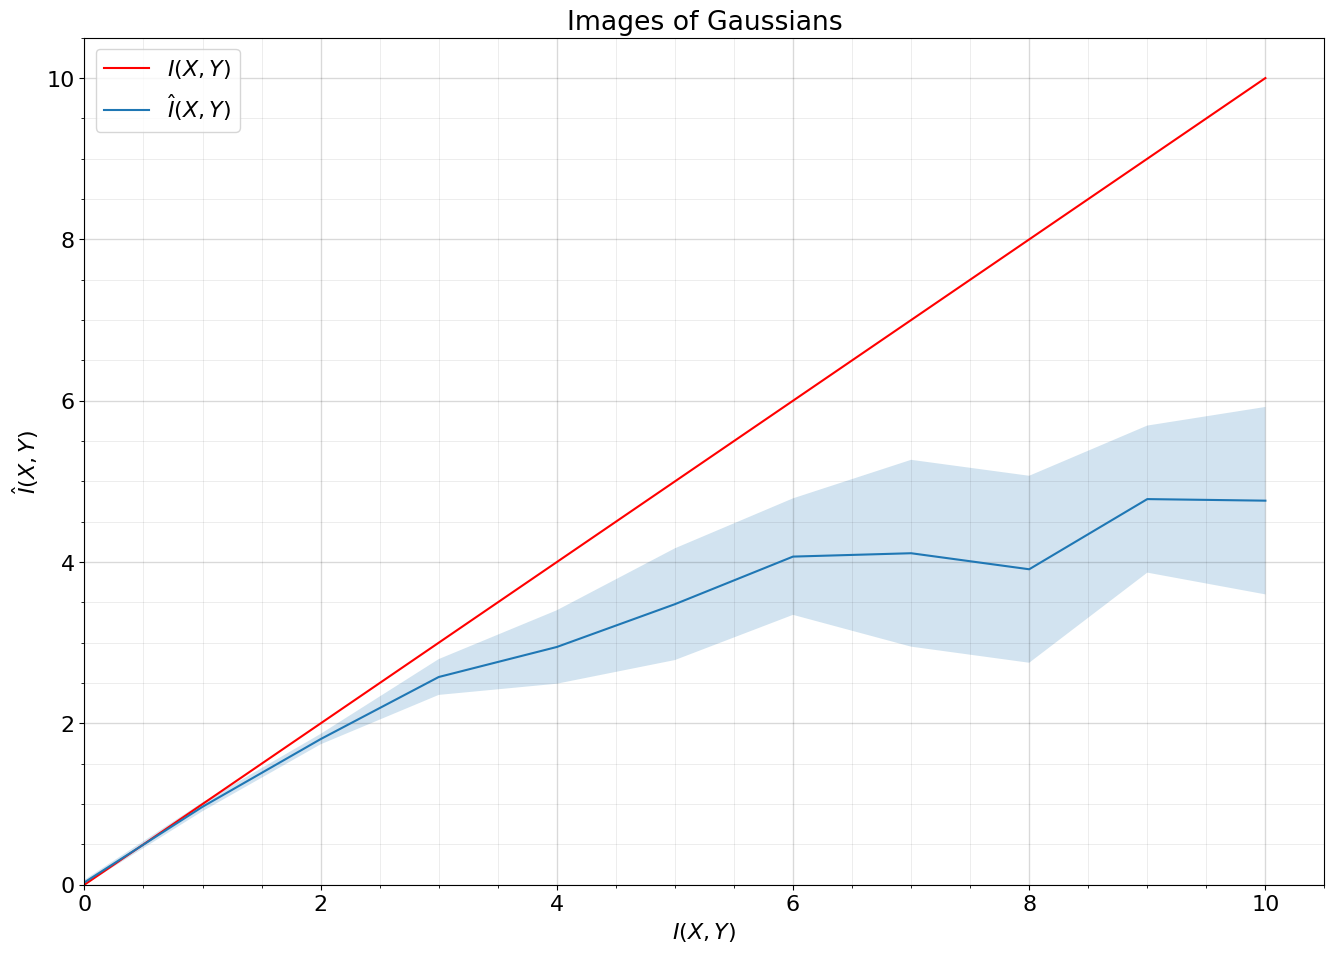

In [14]:
plot_estimated_MI(MI_grid, estimated_MI, "Images of Gaussians")